# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x1])

I = np.identity(2)
alphas = [0.1, 0.04, 0.86] # change here


# add 1-3 line of code here
for alpha in alphas:
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    
    square_error = 0
    for i in range (len(x)):
        diff = y[i,0]-(x[i,1]*w[0,1]+w[0,0])
        square_error += diff*diff
    
    print("dla ", alpha, " bład wynosi ", square_error)
        
    x_ = np.array([130,200])
    y_ = x_*w[1,0]+w[0,0]
    plt.plot(x_, y_,color='r')
    
    
# add 1-3 lines to compare the results

plt.scatter(x1, y, color='g')

plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [233]:
import copy
def sgd(w, x, y):
    print (w)
    #new_w = copy.copy(w)
    new_w = w
    diff = float('inf')
    
    i = 1
    while i > 0:
        d = 0
        for i in range (len(x)):
            
            diff = y[i,0]-(x[i,1]*new_w[0,1]+new_w[0,0])
            d = d + ( (-2)*x[i,1]*diff )
    
        new_w = new_w-d
        
        i = i - 1
        print (d)
    return new_w

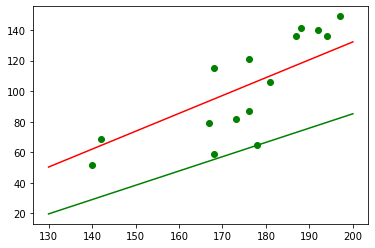

In [237]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
x1 = x
x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 


w = np.linalg.inv(x.T*x + alpha * I)*x.T*y # update this line
w=w.ravel()

new_w = w - 0.23395751552925503


#print(sgd(w,x,y))




x_ = np.array([130,200])
y_ = x_*w[0,1]+w[0,0]
plt.plot(x_, y_,color='r')
    
x_ = np.array([130,200])
y_ = x_*new_w[0,1]+new_w[0,0]
plt.plot(x_, y_,color='g')    

plt.scatter(x1, y, color='g')

plt.show()

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

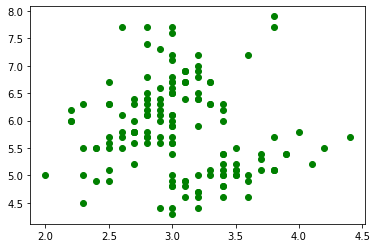

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df['sepal width (cm)'].values # change here
y = iris_df['sepal length (cm)'].values # change here

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b

plt.scatter(x, y, color='g')